# <div align=center>**K-Nearest Neighbors - Classification**</div>

K-nearest Neighbors is an machine learning algorithm created for classification and regression tasts, although it is most used for classification tasts, since in regression this algorithm give us bad results.

The algorithm is based on predicting data by finding the similarities to the underlying data. The original assumption is the data exist in forms of clusters or exist in close proximity

<div align=center><img src='./knn.png'/></div>

## **How is KNN implemented?**

*For example we would like to classify a new type of diamond using the KNN algorithm so:*

1. Initialize a value for K, K will be the total number of neighbors 
2. Calculate the similarity (distance) between the new point and the all data points.
   * This isdone using the Euclidean distance.
   
   $ d(p,q) = d(q, p) = \sqrt{ (q_{1} - p_{1})^{2} + (q_{2} - p_{2})^{2} + ... +  (q_{n} - p_{n})^{2} } = \sqrt{ \sum_{i = 1}^{n} (q_{i} - p{i})^2 } $
3. Choose the K - amount of neighbors with the less distance between the new point and data points.
4. The new data point belongs to the class that is most repeated among the neighbors cluster.

### ***Some Notes***

* Always choose a odd K value
* We need scaling data in KNN algorithms
* We can use Elbow method, Cross-Validation, GridSearchCV or similar methods to choose K value

## **Python Implementation**

### **Imports**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **Data**

The next data set has 3 columns wich describe if a person has cancer or non, depending on the value of the two genes, *Gene One* and *Gene Two*

In [2]:
df = pd.read_csv('../../datasets/gene_expression.csv')
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


### **Preprocessing**

**Verify for missing values**

In [3]:
df.isna().sum()

Gene One          0
Gene Two          0
Cancer Present    0
dtype: int64

**Verify for outliers**

Text(0.5, 1.0, 'Cancer Present Outliers')

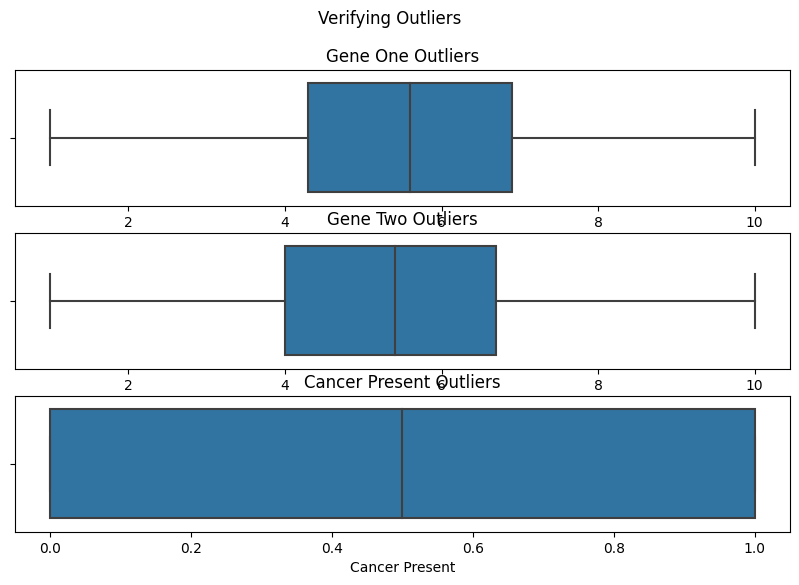

In [11]:
fig, ax = plt.subplots( nrows=3, ncols=1, figsize=(10, 6) )
sns.boxplot( ax=ax[0], data=df, x= 'Gene One' )
sns.boxplot( ax=ax[1], data=df, x= 'Gene Two' )
sns.boxplot( ax=ax[2], data=df, x= 'Cancer Present' )
fig.suptitle('Verifying Outliers')
ax[0].set_title('Gene One Outliers')
ax[1].set_title('Gene Two Outliers')
ax[2].set_title('Cancer Present Outliers')

### **EDA**

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


In [13]:
# number of rows and columns
df.shape

(3000, 3)

In [15]:
# Statistical description
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Gene One,3000.0,5.600133,1.828388,1.0,4.3,5.6,6.9,10.0
Gene Two,3000.0,5.410467,1.729081,1.0,4.0,5.4,6.7,10.0
Cancer Present,3000.0,0.500000,0.500083,0.0,0.0,0.5,1.0,1.0


<Axes: xlabel='Gene One', ylabel='Gene Two'>

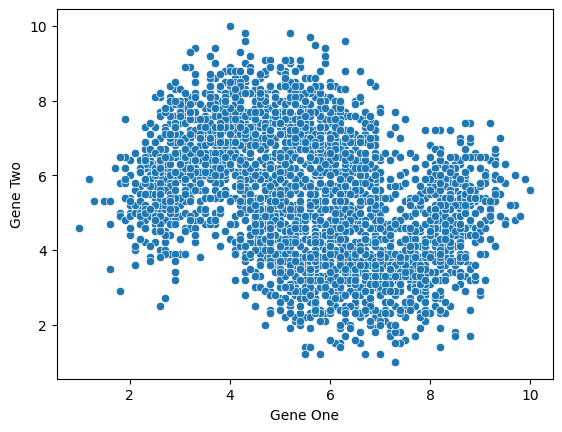

In [16]:
# Plot Gene One vs Gene Two
sns.scatterplot(data= df, x= 'Gene One', y= 'Gene Two')


<Axes: xlabel='Gene One', ylabel='Gene Two'>

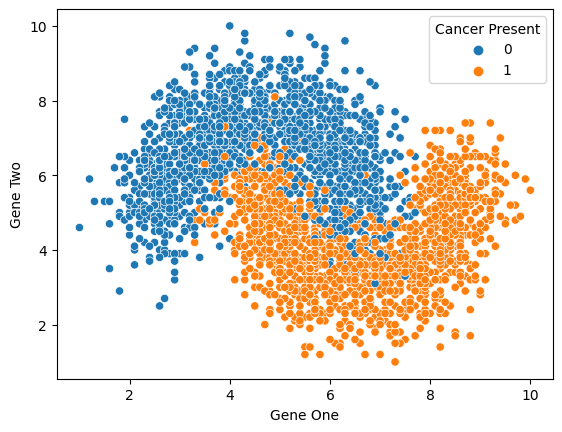

In [17]:
# Plot Gene One vs Gene Two per Cancer PResent
sns.scatterplot(data= df, x= 'Gene One', y= 'Gene Two', hue= 'Cancer Present')

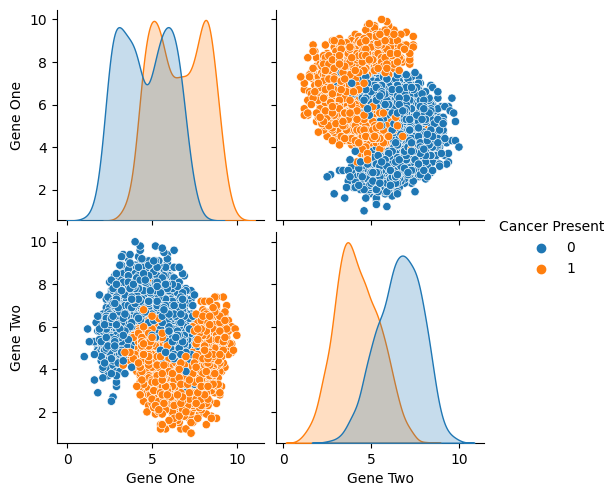

In [25]:
# Data distribution
sns.pairplot(df, hue='Cancer Present')

### **Machine LEarning Model**

**Separing Data in Features | Label**

In [19]:
X = df.drop('Cancer Present', axis=1)
y= df['Cancer Present']

**Train | Test Split**

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Scaling Data**

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

**KNN Model**

In [27]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model_fited = knn_model.fit(scaled_X_train, y_train)

**Training Score**

In [28]:
knn_model_fited.score(scaled_X_train, y_train)

0.9441666666666667

**Test Score**

In [29]:
knn_model_fited.score(scaled_X_test, y_test)

0.92

**Prediciting Values**

In [30]:
y_pred = knn_model_fited.predict(scaled_X_test)

**Metrics**

In [32]:
from sklearn.metrics import confusion_matrix, classification_report

print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))

print('Classification Report')
print( classification_report(y_test, y_pred) )

Confusion Matrix
[[280  18]
 [ 30 272]]
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       298
           1       0.94      0.90      0.92       302

    accuracy                           0.92       600
   macro avg       0.92      0.92      0.92       600
weighted avg       0.92      0.92      0.92       600

